In [51]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

In [53]:
df = pd.read_csv("D:/NIDA/6005_RealTime/Final_Project/avro_kafka_example/Offline_data.csv")

In [76]:
df.columns

Index(['Unnamed: 0', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses',
       'Severity'],
      dtype='object')

In [77]:
df.head()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Severity
timestamp,,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:10,10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:29,30,-0.012,9.328,9.312,-0.022,9.328,53.425,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:39,40,-0.012,9.318,9.302,-0.022,9.318,53.475,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:59,60,-0.012,9.296,9.280,-0.024,9.298,53.375,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


## Correlation Plot

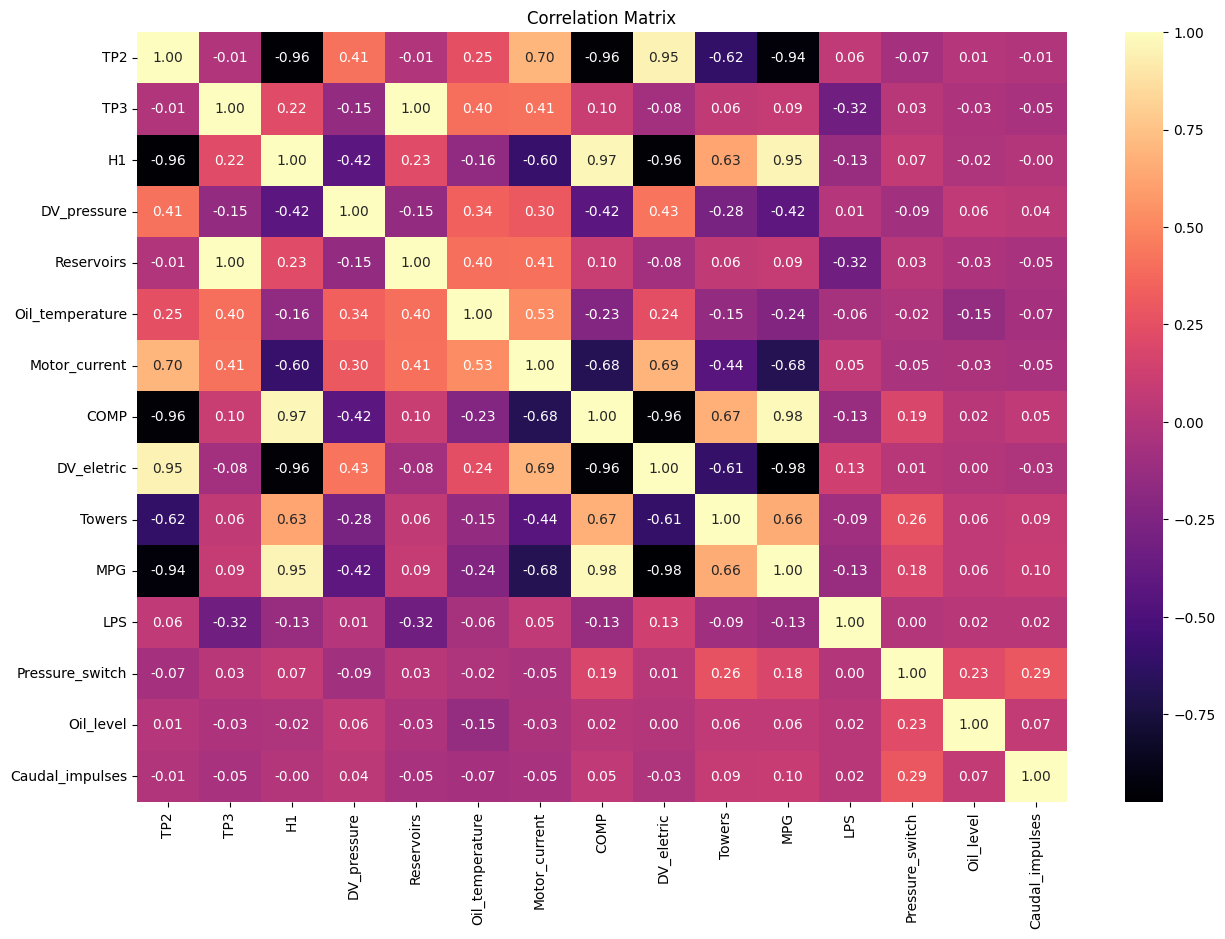

In [78]:
corr_df = df.drop(['Unnamed: 0', 'Severity'], axis=1)

# Step 3: Compute the correlation matrix
correlation_matrix = corr_df.corr()

# Step 4: Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Try y with 0, 1, 2

In [80]:
df_new_severity = df.copy()
severity_mapping = {'high': 2, 'medium': 1, 'low': 0}
df_new_severity['Severity'] = df_new_severity['Severity'].replace(severity_mapping)
df_new_severity.head()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Severity
timestamp,,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:10,10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:29,30,-0.012,9.328,9.312,-0.022,9.328,53.425,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:39,40,-0.012,9.318,9.302,-0.022,9.318,53.475,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:59,60,-0.012,9.296,9.280,-0.024,9.298,53.375,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


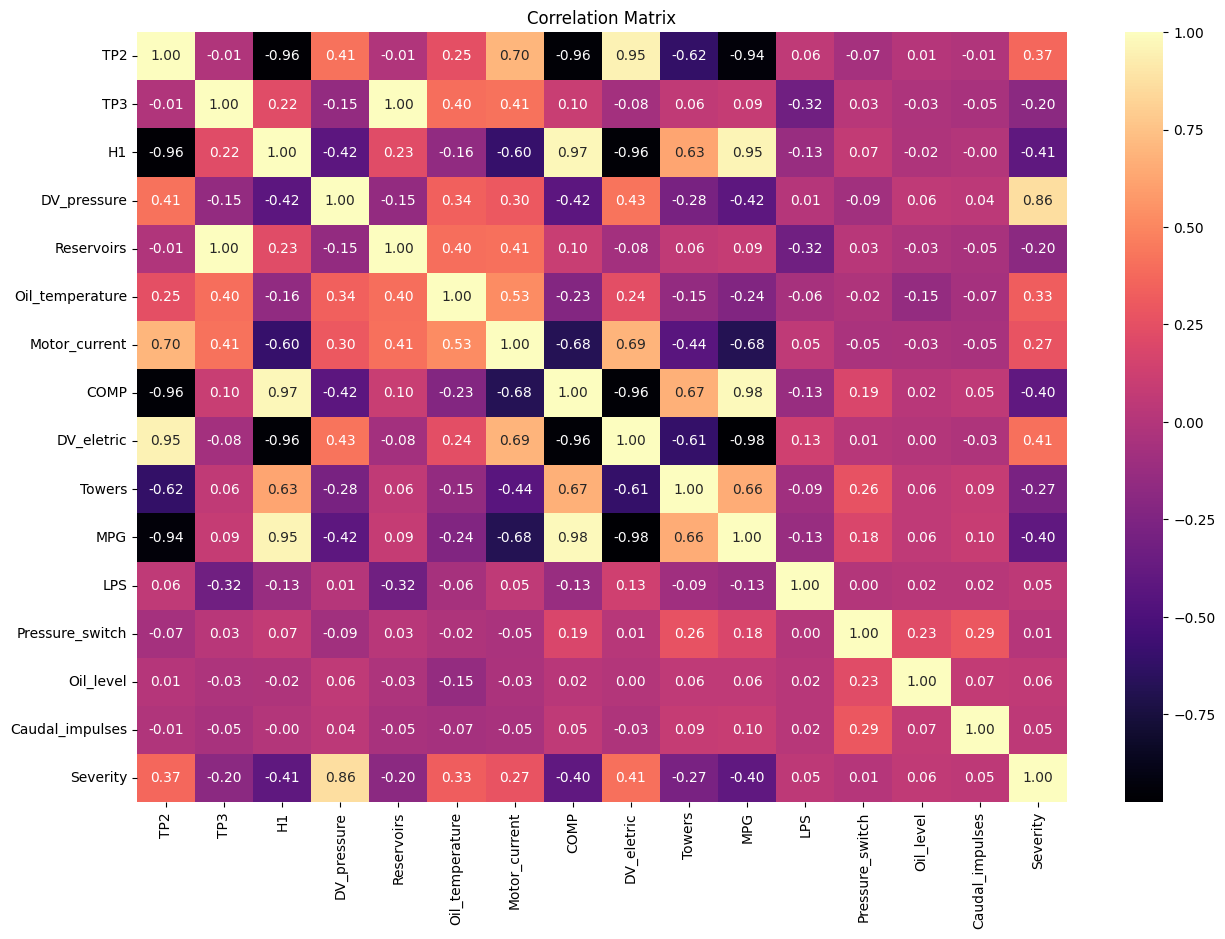

In [66]:
corr_df_severity = df_new_severity.drop(['Unnamed: 0'], axis=1)

# Step 3: Compute the correlation matrix
correlation_matrix = corr_df_severity.corr()

# Step 4: Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Time Series Plot

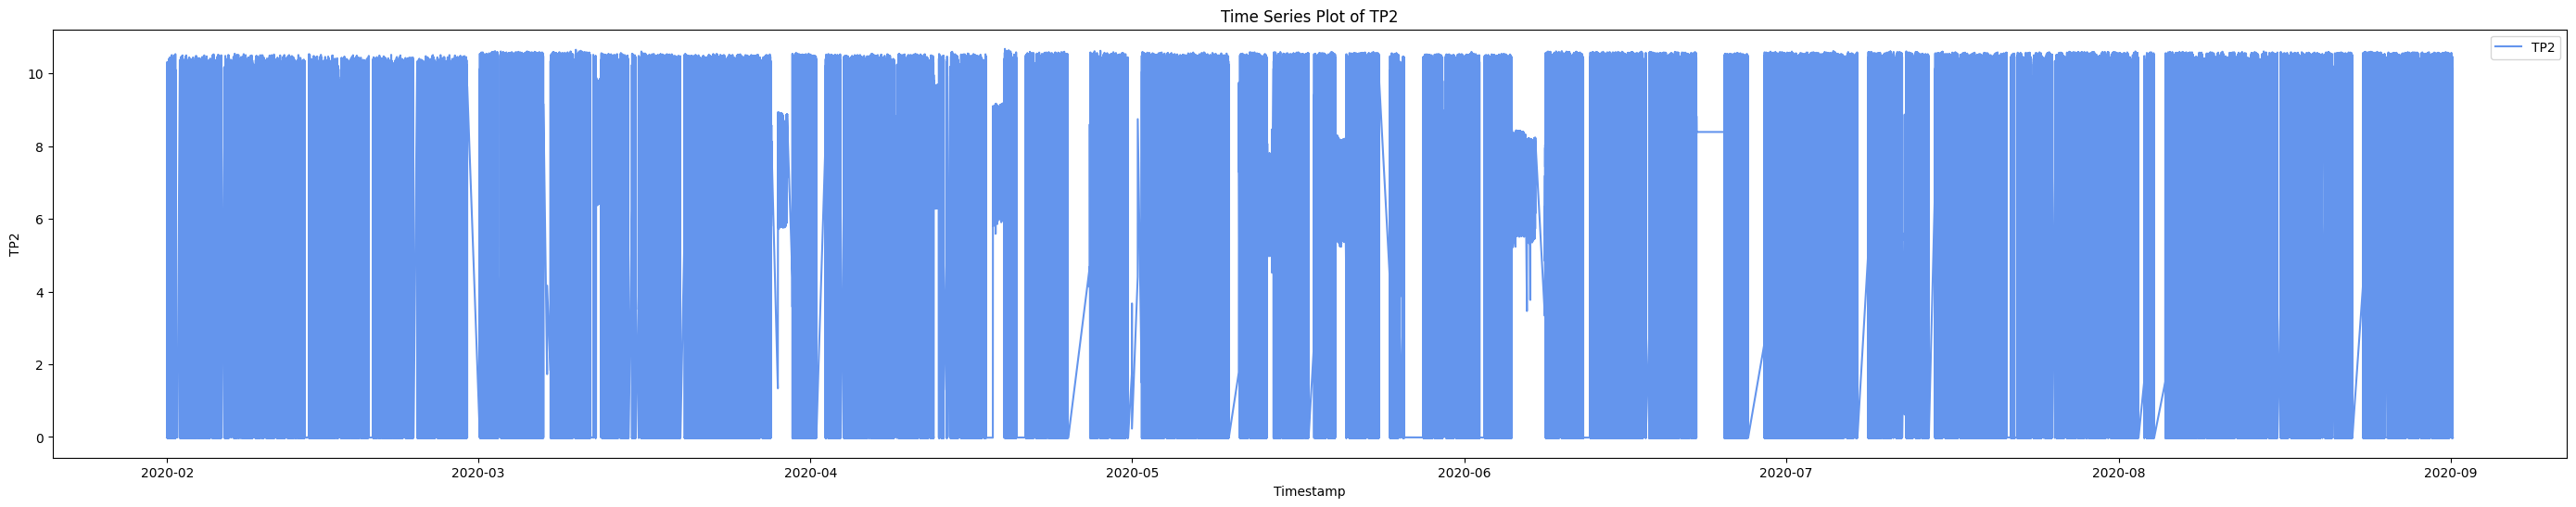

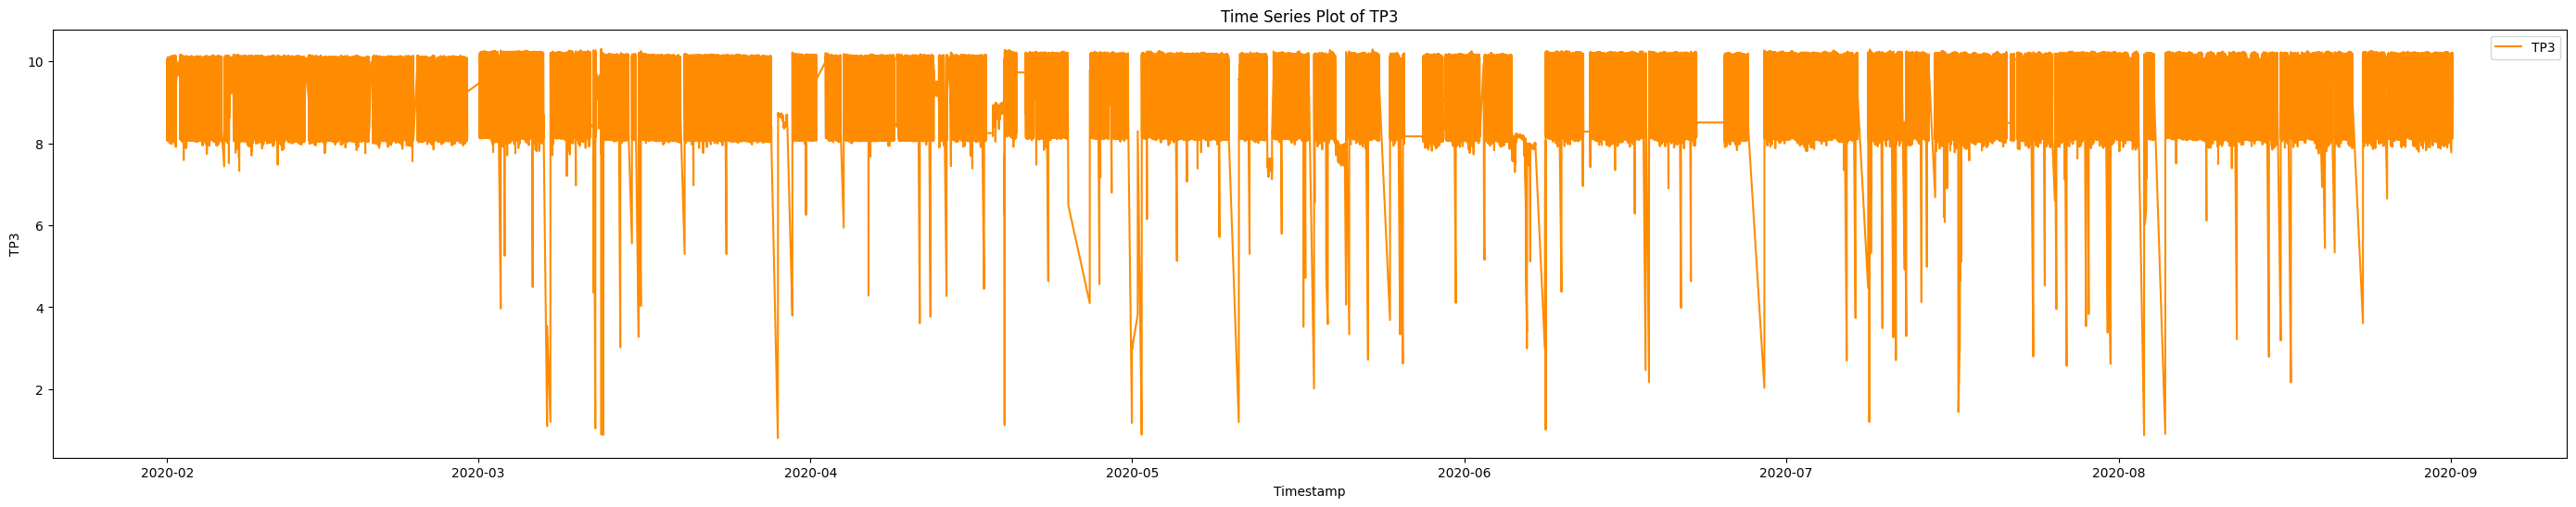

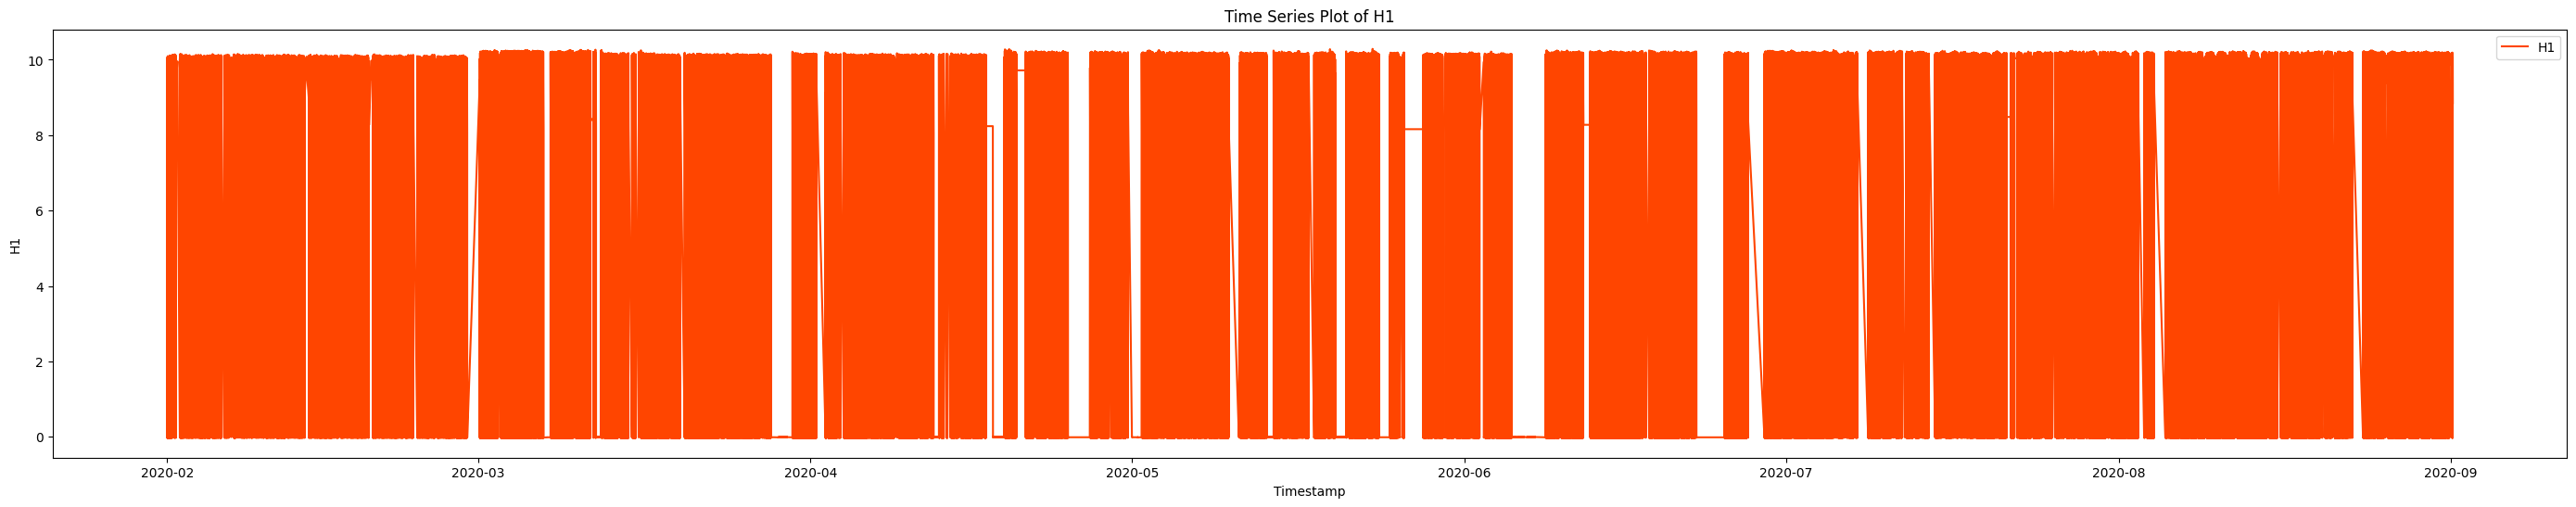

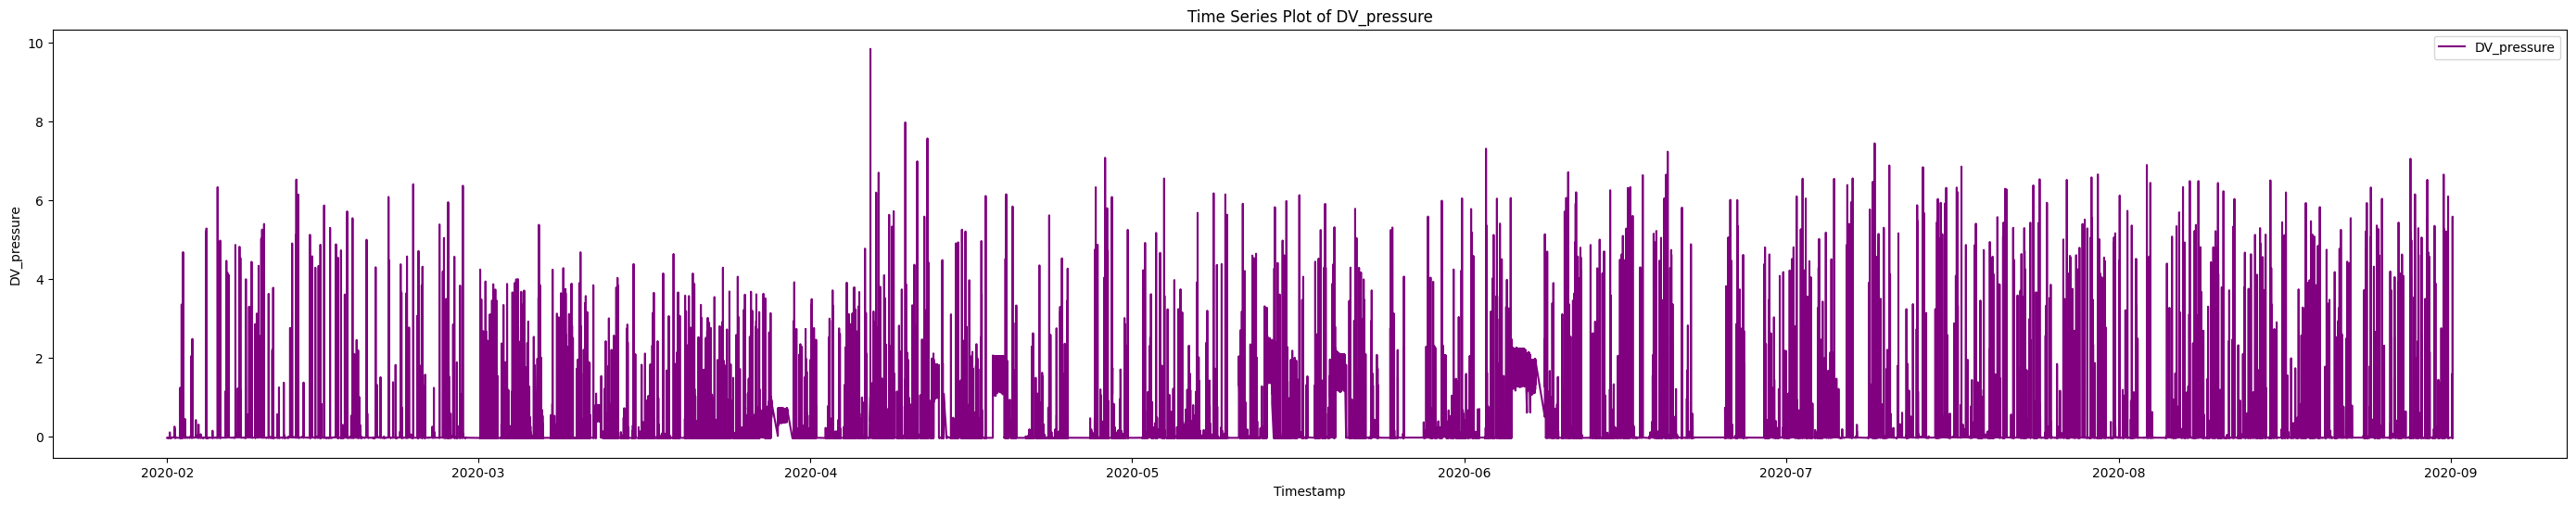

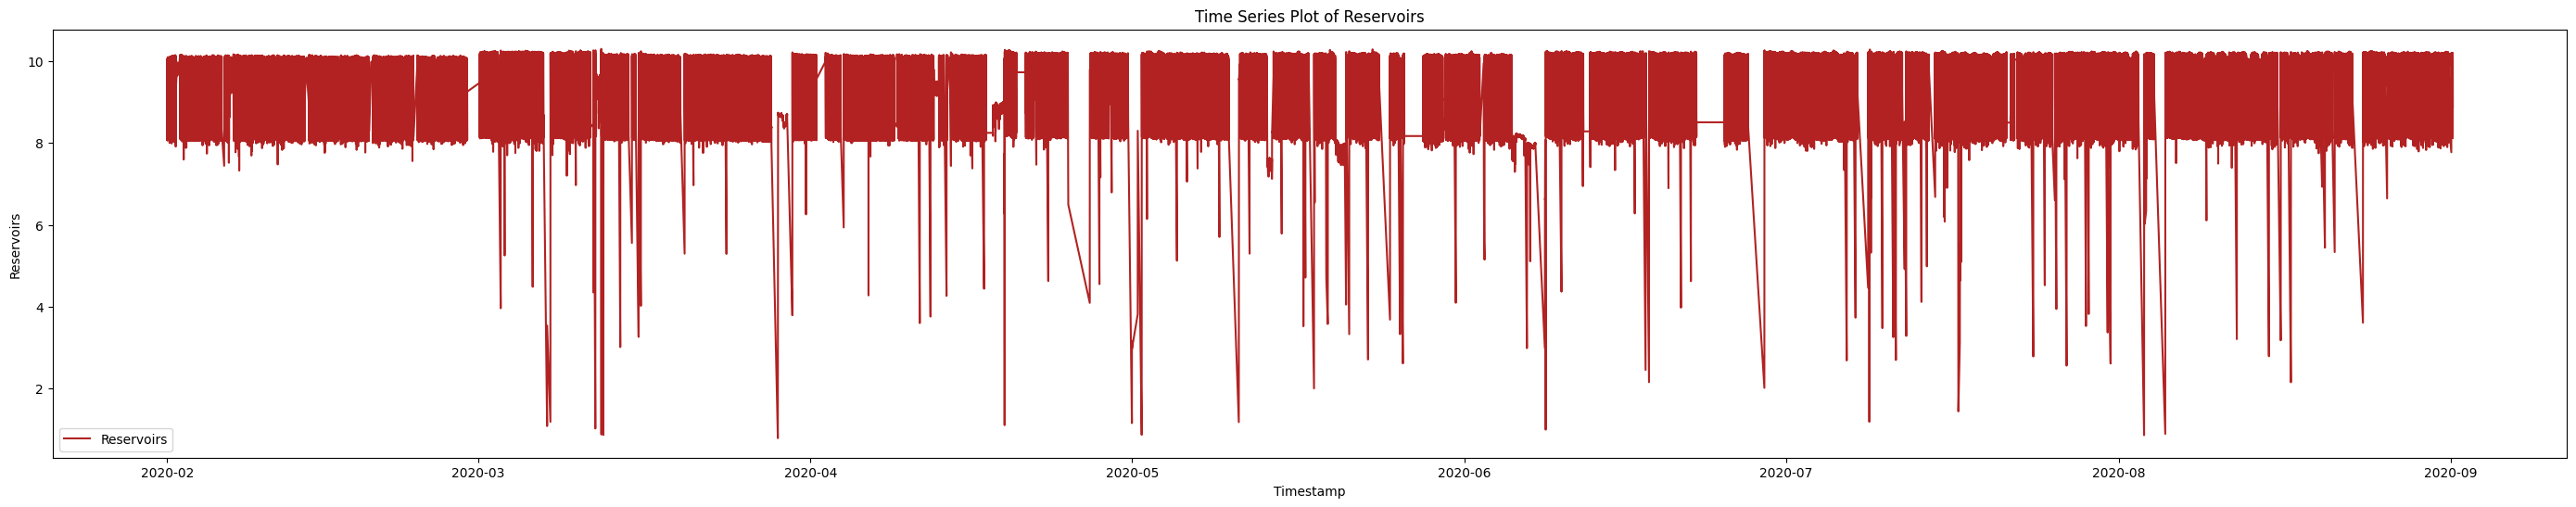

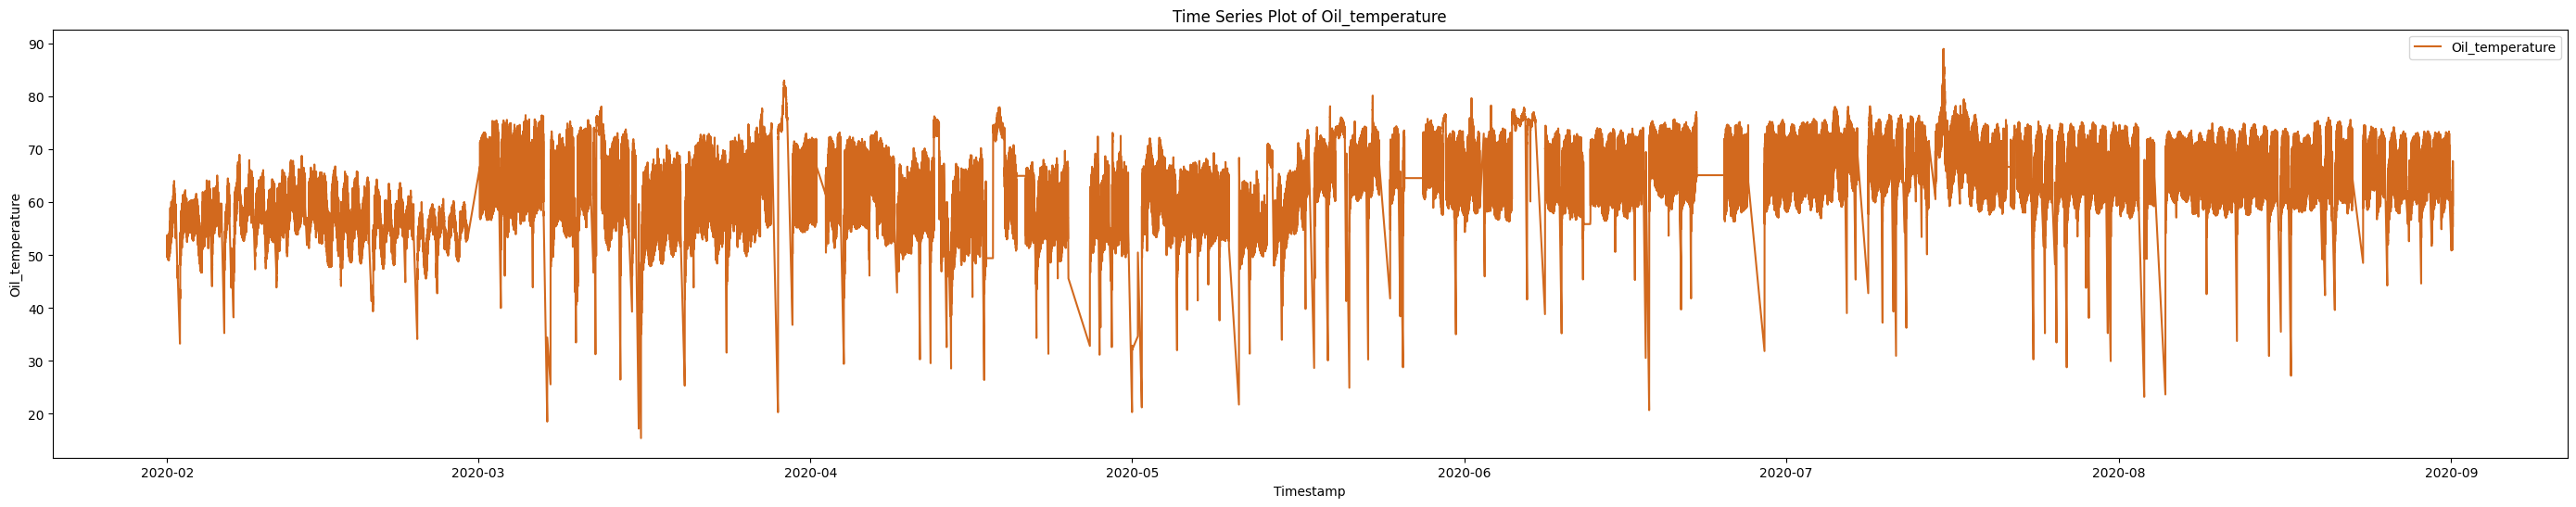

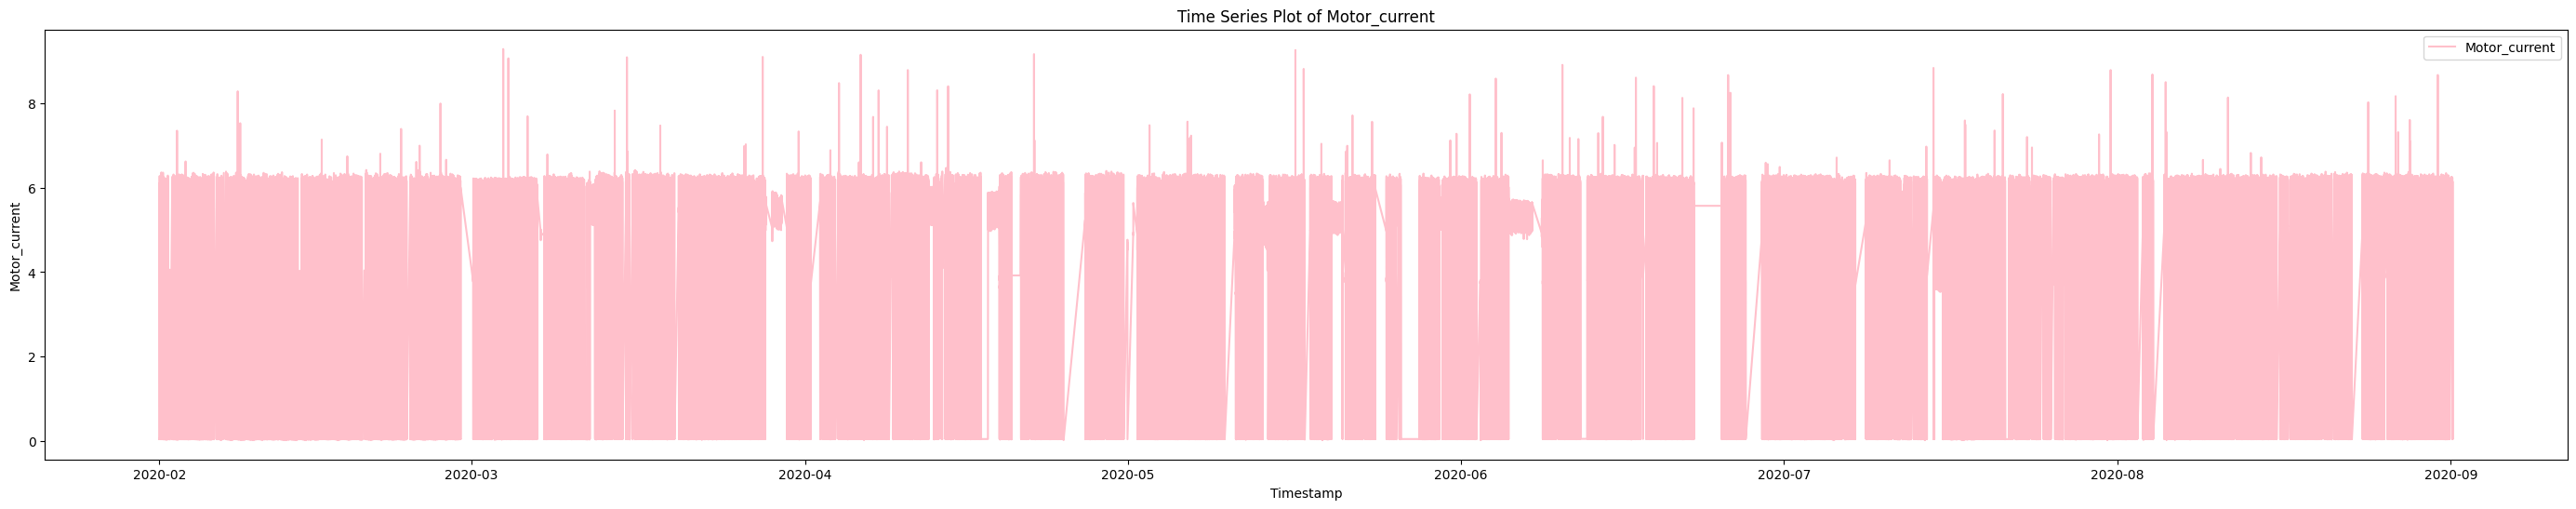

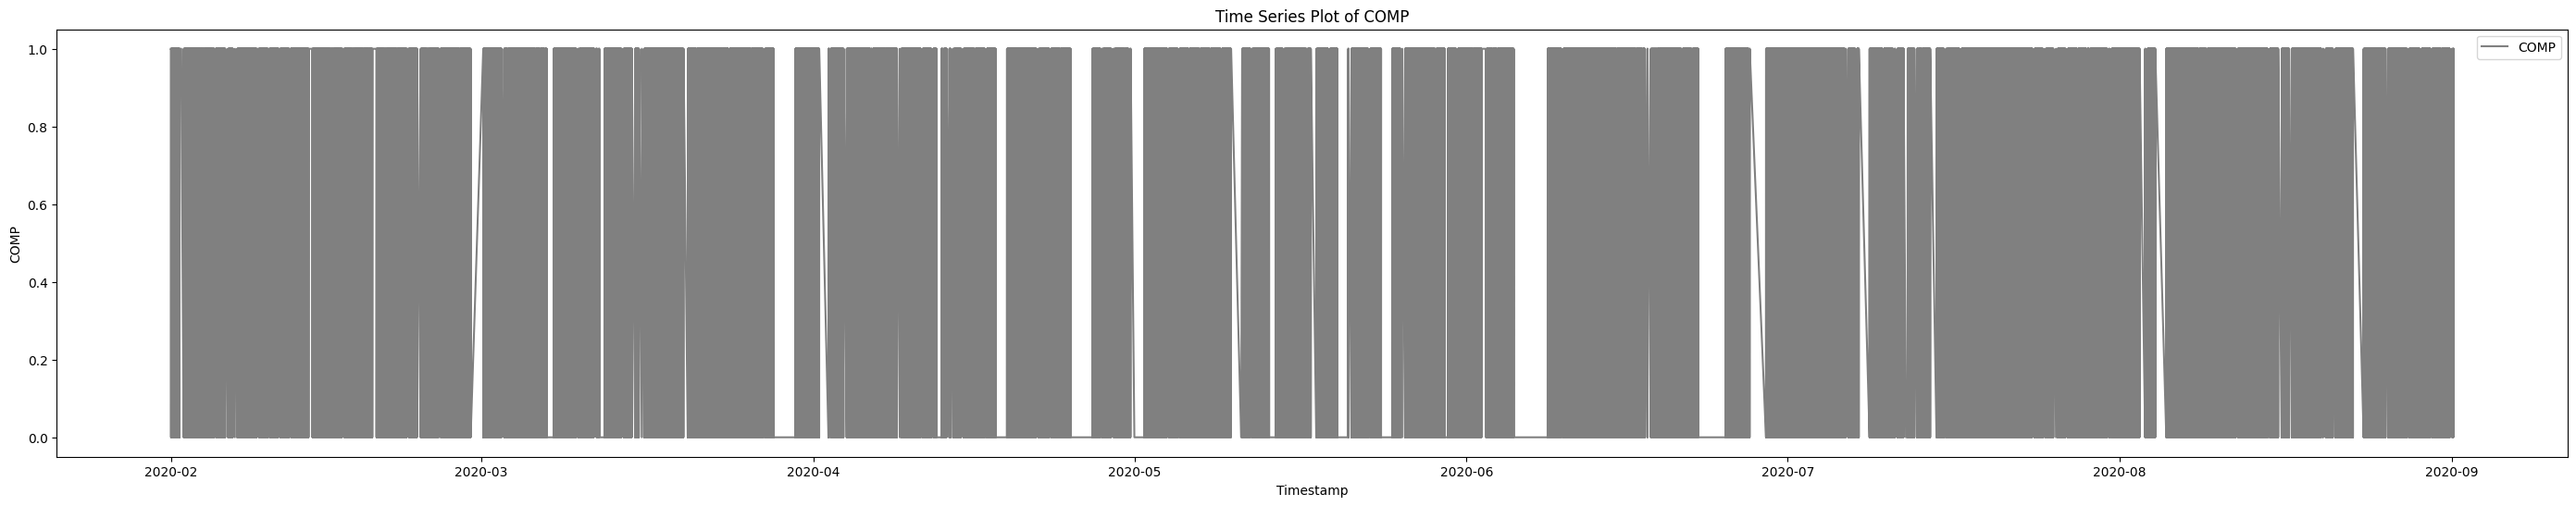

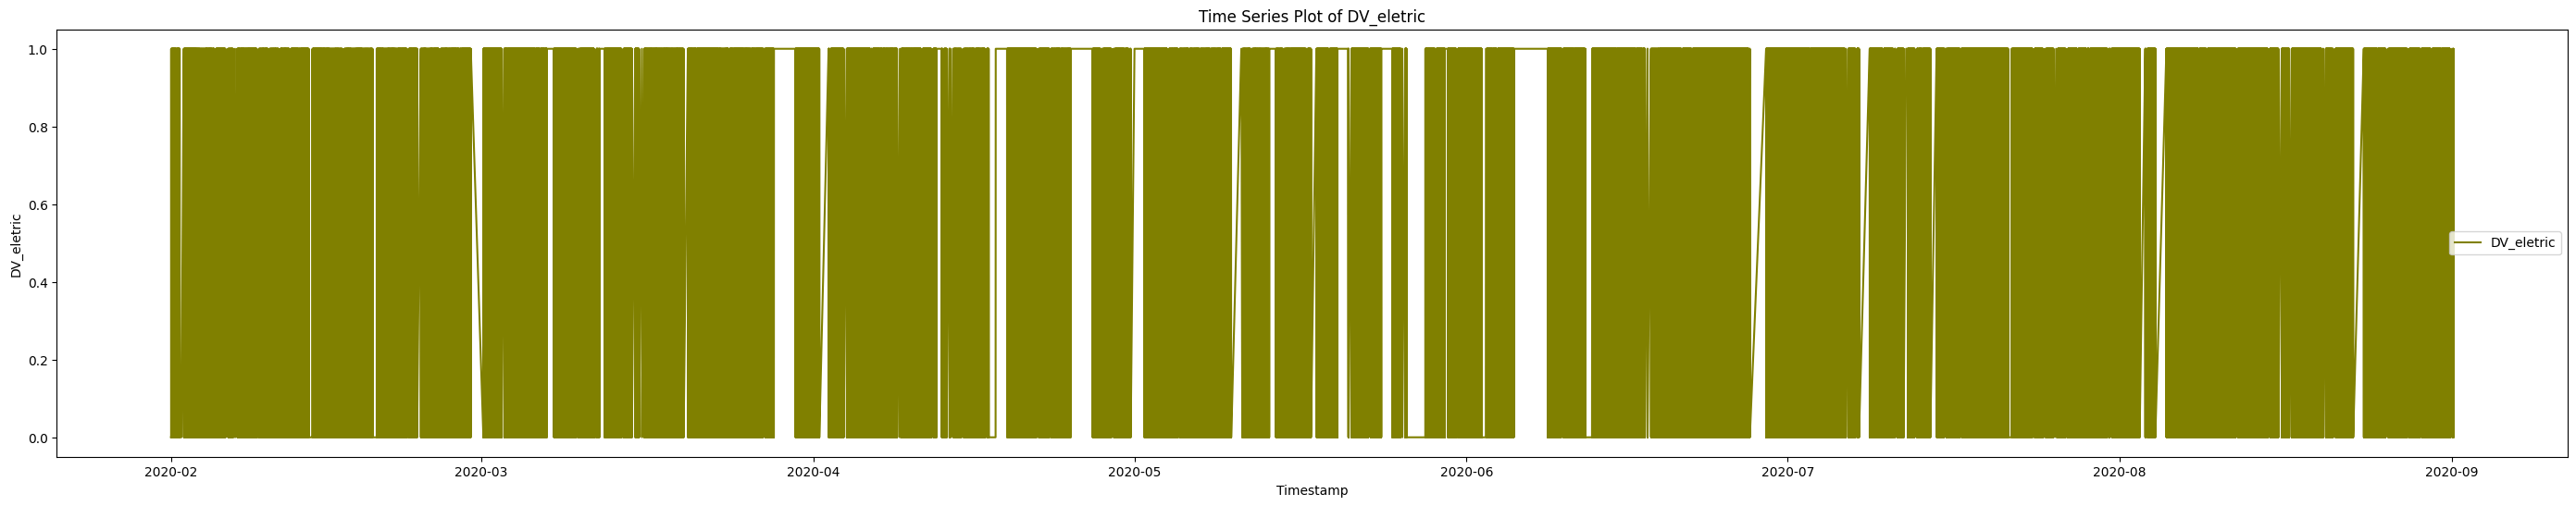

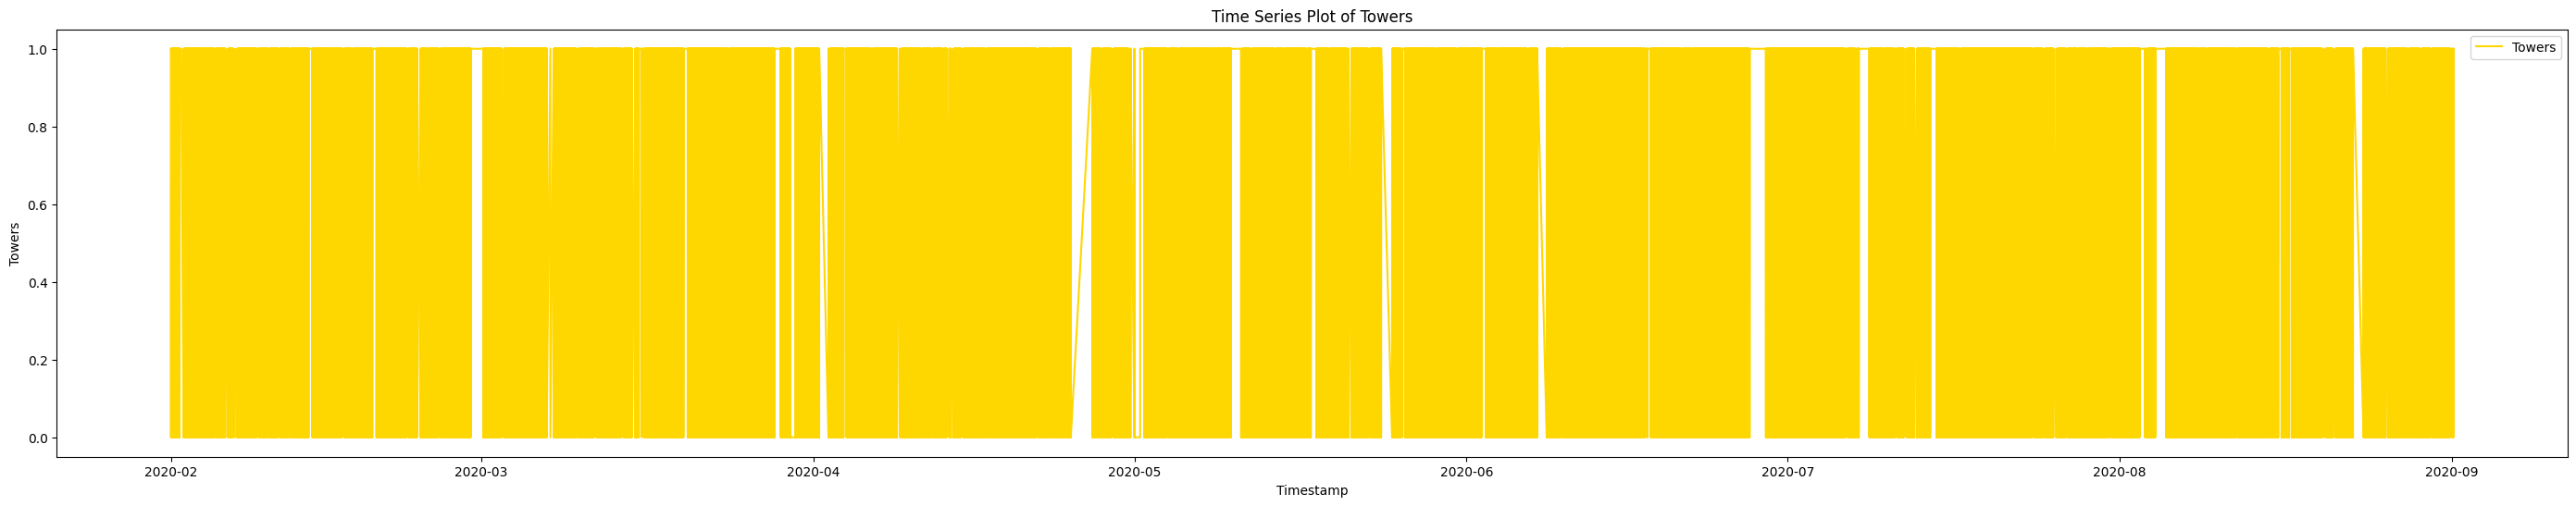

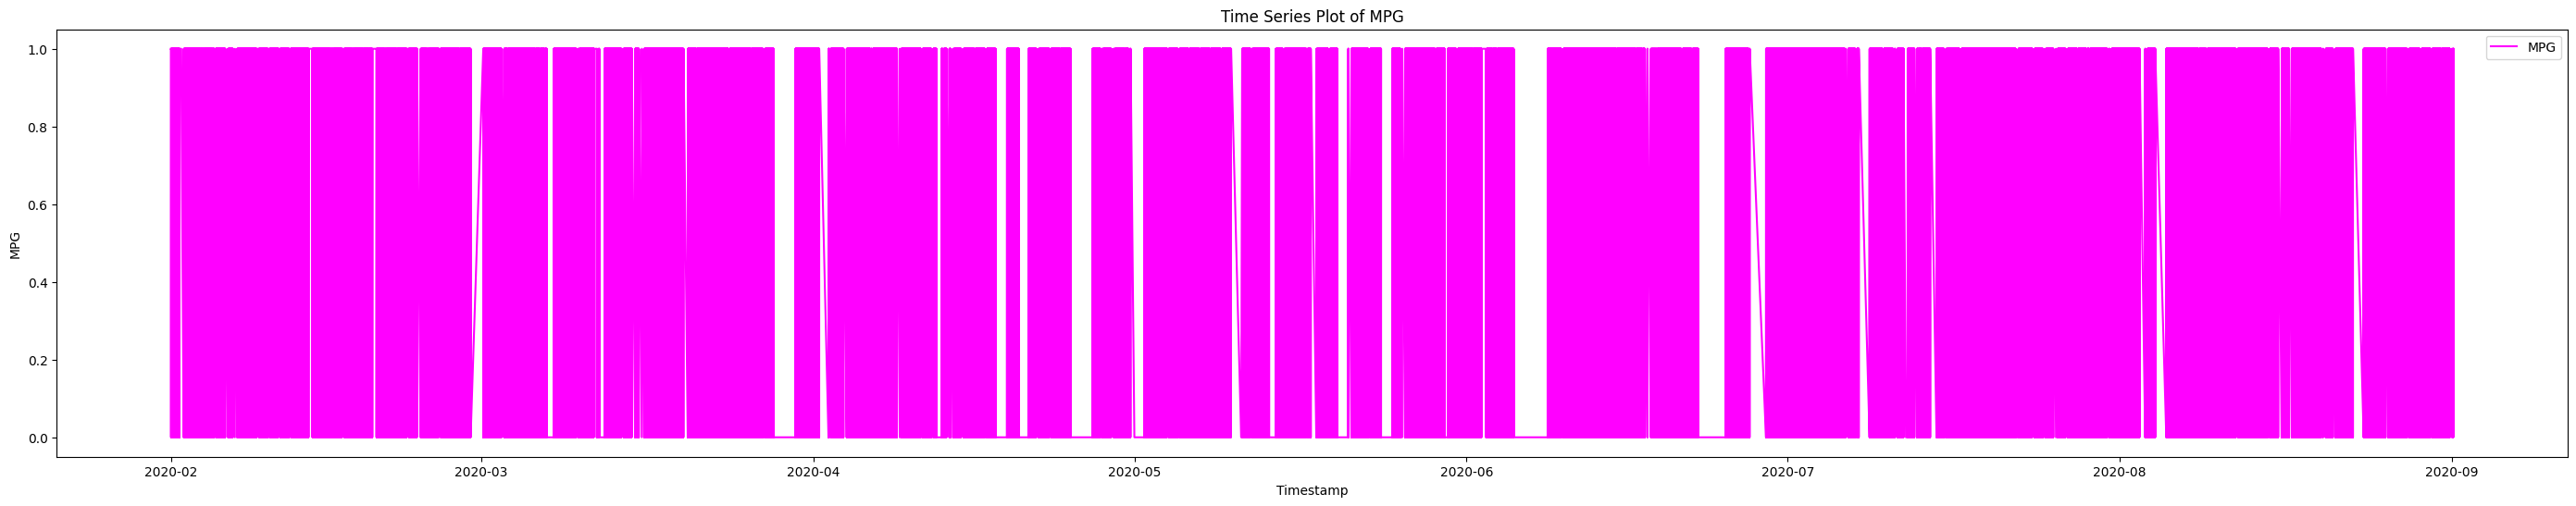

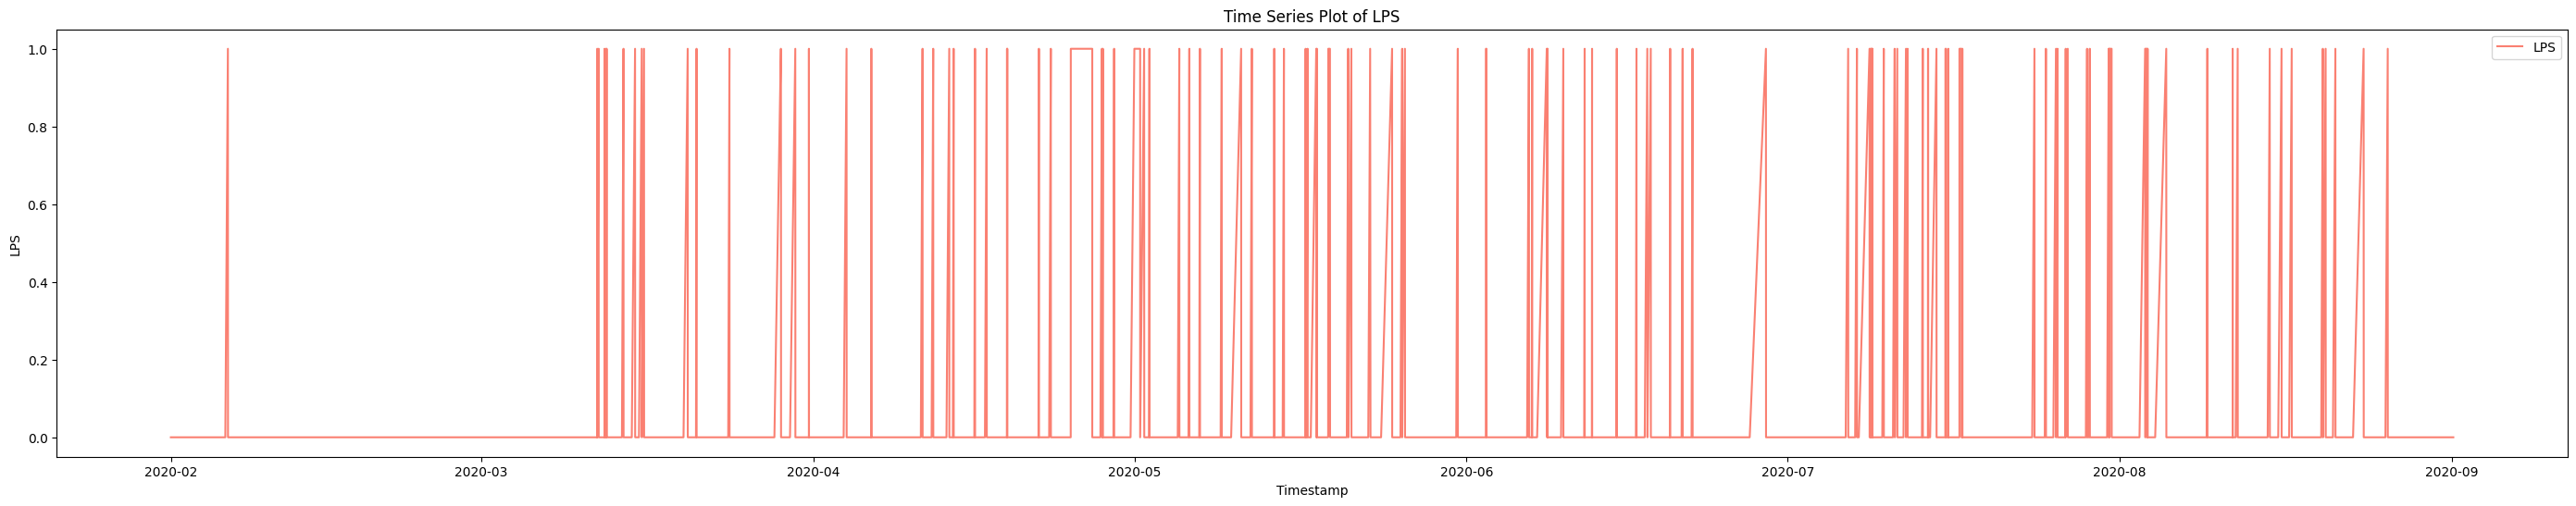

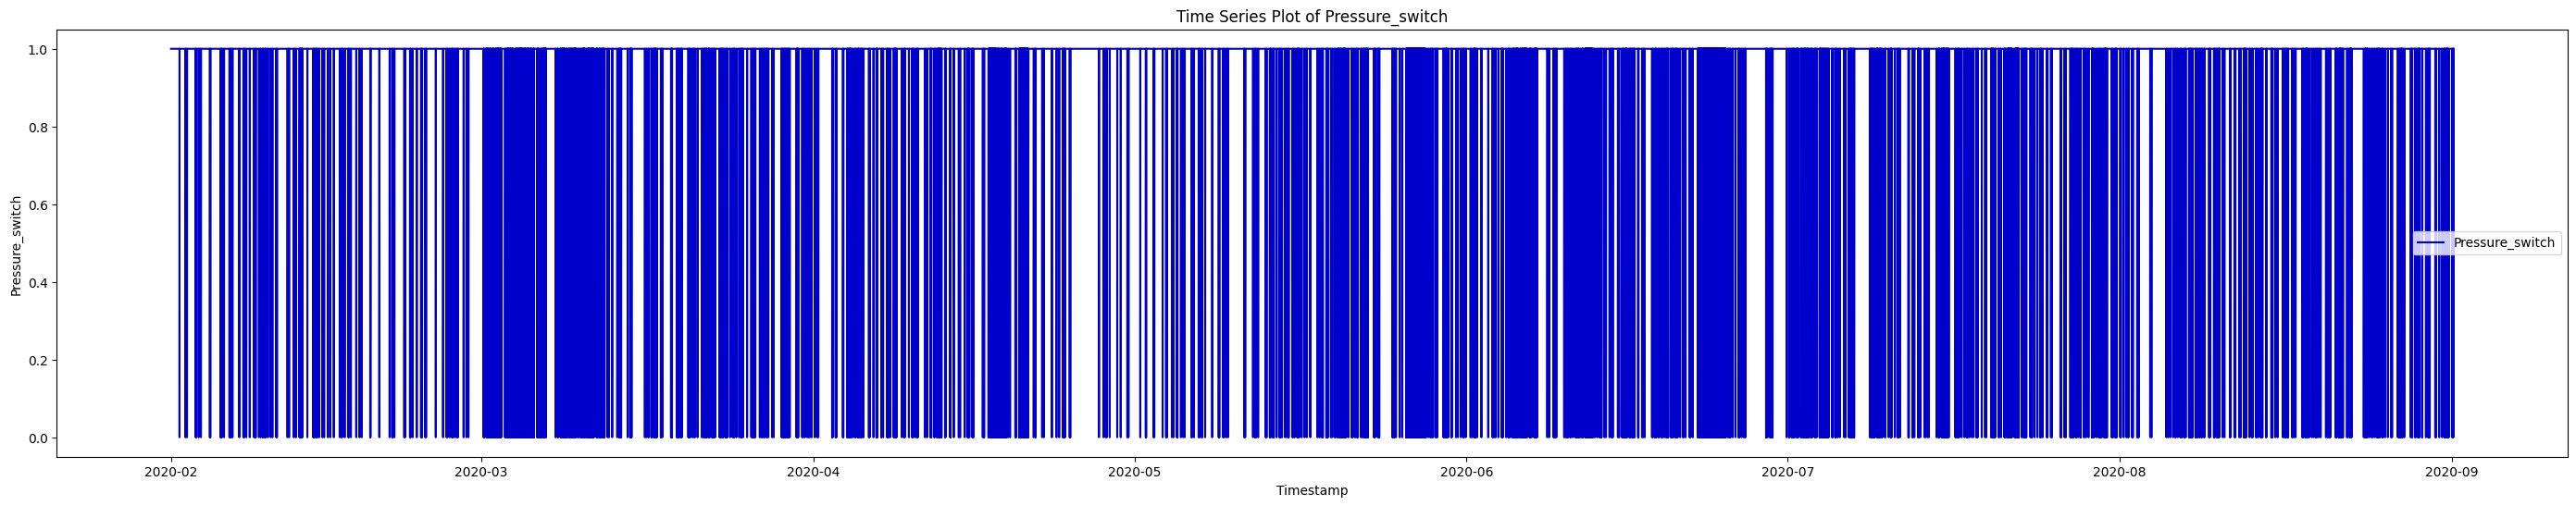

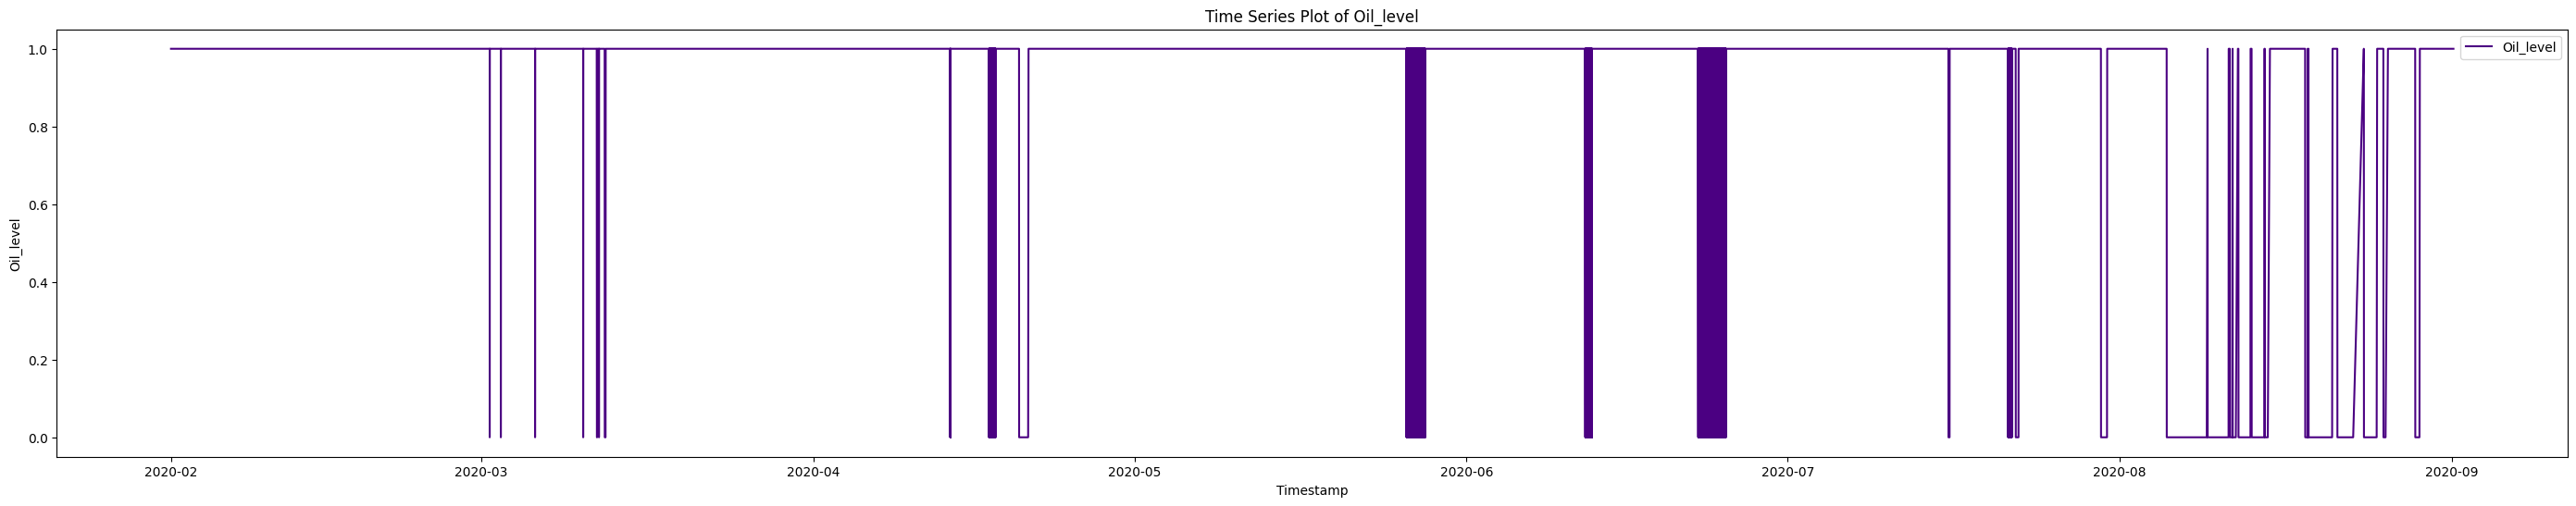

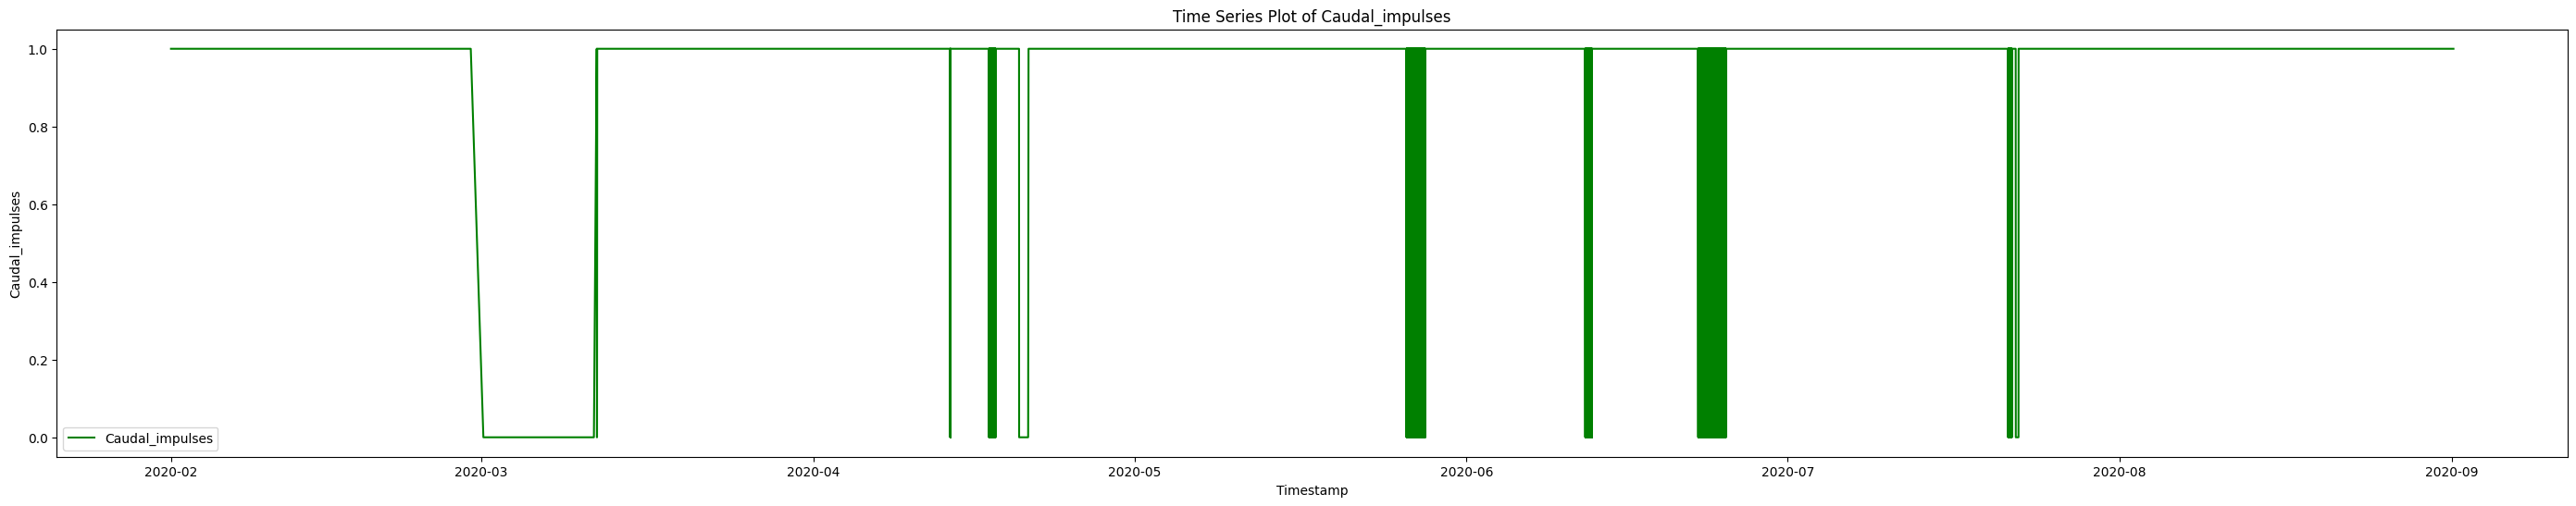

In [59]:
features = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
            'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
            'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

feature_colors = {
    'TP2': 'cornflowerblue',
    'TP3': 'darkorange',
    'H1': 'orangered',
    'DV_pressure': 'purple',
    'Reservoirs': 'firebrick',
    'Oil_temperature': 'chocolate',
    'Motor_current': 'pink',
    'COMP': 'gray',
    'DV_eletric': 'olive',
    'Towers': 'gold',
    'MPG': 'magenta',
    'LPS': 'salmon',
    'Pressure_switch': 'mediumblue',
    'Oil_level': 'indigo',
    'Caudal_impulses': 'green'
}

def plot_feature(df, feature, color):
    plt.figure(figsize=(35, 6))
    plt.plot(df.index, df[feature], label=feature, color=color)
    plt.xlabel('Timestamp')
    plt.ylabel(feature)
    plt.title(f'Time Series Plot of {feature}')
    plt.legend()
    plt.show()

for feature in features:
    plot_feature(df, feature, feature_colors[feature])

## Box Plot

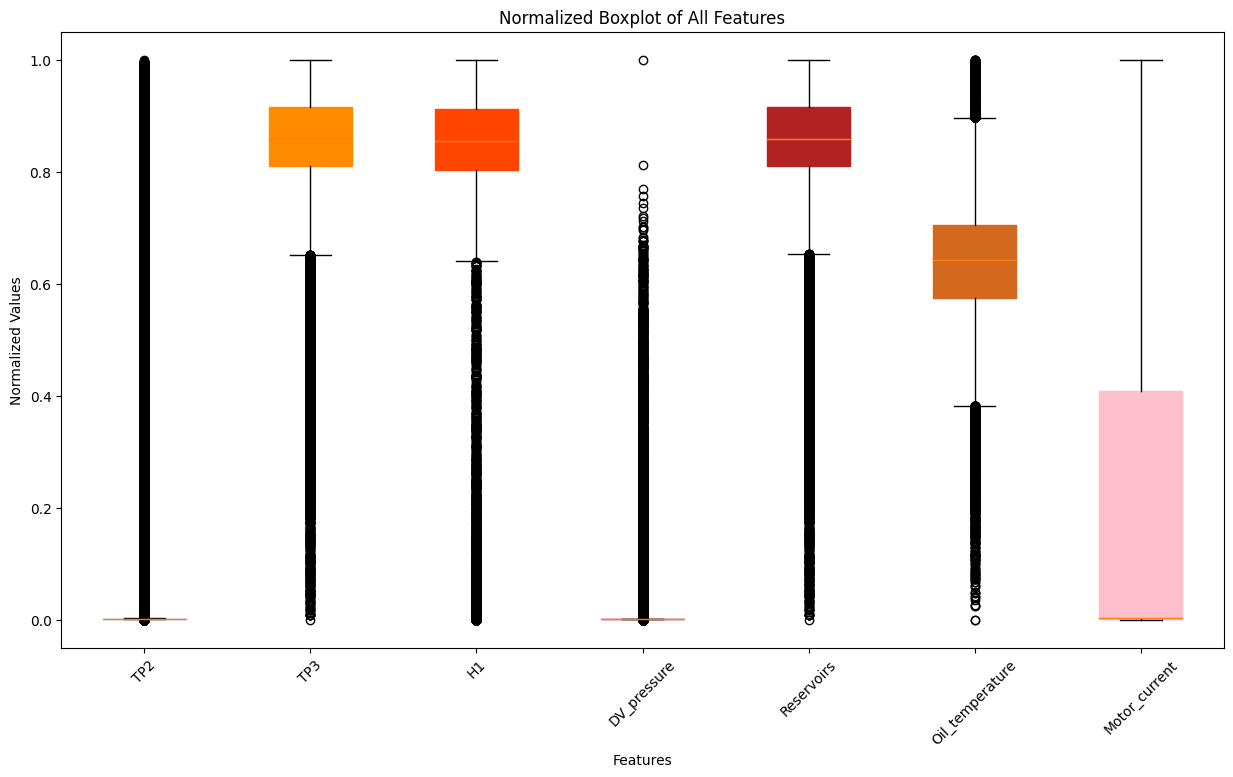

In [71]:
# Define the features and their corresponding colors
features = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']

feature_colors = {
    'TP2': 'cornflowerblue',
    'TP3': 'darkorange',
    'H1': 'orangered',
    'DV_pressure': 'purple',
    'Reservoirs': 'firebrick',
    'Oil_temperature': 'chocolate',
    'Motor_current': 'pink'
}

# Function to normalize the dataframe
def normalize(df, features):
    df_normalized = df.copy()
    for feature in features:
        min_val = df[feature].min()
        max_val = df[feature].max()
        df_normalized[feature] = (df[feature] - min_val) / (max_val - min_val)
    return df_normalized

# Function to plot a combined boxplot for normalized features
def plot_combined_boxplot(df, features, feature_colors):
    plt.figure(figsize=(15, 8))
    
    # Normalize the dataframe
    df_normalized = normalize(df, features)
    
    # Create a list of data for each feature
    data = [df_normalized[feature] for feature in features]
    
    # Plot boxplots for all features
    box = plt.boxplot(data, patch_artist=True)
    
    # Set the colors for each boxplot
    for patch, feature in zip(box['boxes'], features):
        patch.set_facecolor(feature_colors[feature])
        patch.set_edgecolor(feature_colors[feature])
    
    # Customize the plot
    plt.xlabel('Features')
    plt.ylabel('Normalized Values')
    plt.title('Normalized Boxplot of All Features')
    plt.xticks(range(1, len(features) + 1), features, rotation=45)
    plt.show()

# Assuming df is your dataframe
plot_combined_boxplot(df, features, feature_colors)


## Imbalanced Plot

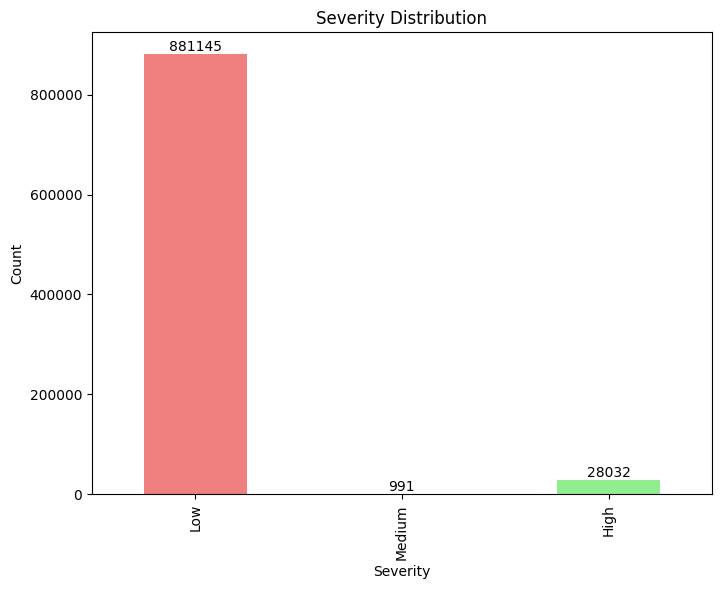

In [61]:
# Map severity levels to numerical values if not already done
severity_mapping = {'high': 2, 'medium': 1, 'low': 0}
df['Severity'] = df['Severity'].map(severity_mapping)

# Count the occurrences of each severity level
severity_counts = df['Severity'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = severity_counts.plot(kind='bar', color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])  # Ensure labels match the mapping

# Annotate each bar with its count
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=10)

plt.show()

In [62]:
severity_counts = df['Severity'].value_counts()
print(severity_counts)


Severity
0    881145
2     28032
1       991
Name: count, dtype: int64


### Undersampling

In [90]:
df1 = df.copy()
df1.drop(columns=['Unnamed: 0'])

display(df1.info)

<bound method DataFrame.info of                      Unnamed: 0    TP2    TP3     H1  DV_pressure  Reservoirs  \
timestamp                                                                       
2020-02-01 00:00:00           0 -0.012  9.358  9.340       -0.024       9.358   
2020-02-01 00:00:10          10 -0.014  9.348  9.332       -0.022       9.348   
2020-02-01 00:00:29          30 -0.012  9.328  9.312       -0.022       9.328   
2020-02-01 00:00:39          40 -0.012  9.318  9.302       -0.022       9.318   
2020-02-01 00:00:59          60 -0.012  9.296  9.280       -0.024       9.298   
...                         ...    ...    ...    ...          ...         ...   
2020-09-01 03:58:50    15169410 -0.012  8.946  8.932       -0.022       8.948   
2020-09-01 03:59:00    15169420 -0.012  8.934  8.920       -0.022       8.934   
2020-09-01 03:59:10    15169430 -0.014  8.918  8.906       -0.022       8.918   
2020-09-01 03:59:40    15169460 -0.012  8.876  8.864       -0.022       8.878

In [85]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = rus.fit_resample(df1.drop(columns=['Severity']), df1['Severity'])

df_resampled = pd.DataFrame(X_resampled, columns = df1.columns.drop('Severity'))
df_resampled['Severity'] = y_resampled

print(df_resampled['Severity'].value_counts())

Severity
0    991
1    991
2    991
Name: count, dtype: int64


In [86]:
df1_severity_mapping = {'high': 2, 'medium': 1, 'low': 0}
df_resampled['Severity'] = df_resampled['Severity'].replace(df1_severity_mapping)
df_resampled.head()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Severity
timestamp,,,,,,,,,,,,,,,,,
2020-06-25 13:45:35,10400830,-0.014,9.926,9.916,-0.018,9.926,74.150,3.8025,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-05-30 17:05:25,8470280,-0.012,8.794,8.780,-0.018,8.796,62.900,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-05-07 13:24:35,6890790,-0.014,8.290,8.280,-0.018,8.296,54.975,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-05-12 10:14:40,7198110,-0.016,9.228,9.216,-0.022,9.228,55.900,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-07 05:06:52,442180,-0.012,8.094,8.082,-0.020,8.096,45.050,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


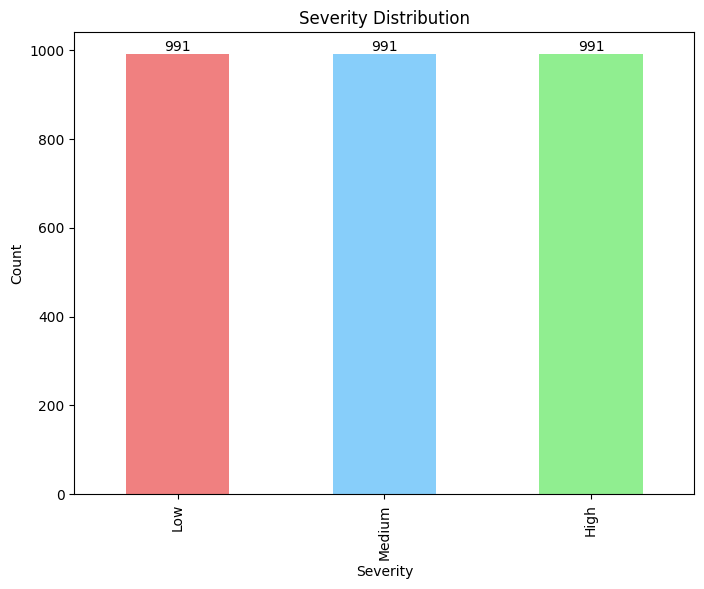

In [87]:
# Count the occurrences of each severity level
df1_severity_counts = df_resampled['Severity'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = df1_severity_counts.plot(kind='bar', color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])  # Ensure labels match the mapping

# Annotate each bar with its count
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=10)

plt.show()